In [25]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
#
import scienceplots
from cmcrameri import cm
from collections import Counter

plt.style.use(["science"])

In [73]:
dataset_loc = "../datasets/FDP"
data_loc_pattern = "../results/pattern_random0/train_100/images/"
data_loc_structure = "../results/structure_random0/train_100/images/"

In [74]:
intensities_pattern = []
intensities_pattern_real = []
intensities_structure_real = []
intensities_structure = []

for img_file in os.listdir(data_loc_pattern):
    img = cv2.imread(os.path.join(data_loc_pattern, img_file))
    intensities_pattern += list(img[:, :, 0].ravel())
    ICSD_code = img_file.split("_")[0]
    img = cv2.imread(os.path.join(dataset_loc, ICDS_code, ICDS_code + "_+0+0+0.png"))
    intensities_pattern_real += list(img[:, :, 0].ravel())

for img_file in os.listdir(data_loc_structure):
    img = cv2.imread(os.path.join(data_loc_structure, img_file))
    intensities_structure += list(img[:, :, 0].ravel())
    ICSD_code = img_file.split("_")[0]
    img = cv2.imread(os.path.join(dataset_loc, ICDS_code, ICDS_code + "_structure.png"))
    intensities_structure_real += list(img[:, :, 0].ravel())

intensities_pattern = np.array(intensities_pattern)
intensities_structure = np.array(intensities_structure)
intensities_pattern_real = np.array(intensities_pattern_real)
intensities_structure_real = np.array(intensities_structure_real)


count = len(intensities_pattern)
print(len(intensities_pattern))


163250176


In [71]:
counter_pattern = Counter(intensities_pattern)
counter_structure = Counter(intensities_structure)
counter_pattern_real = Counter(intensities_pattern_real)
counter_structure_real = Counter(intensities_structure_real)

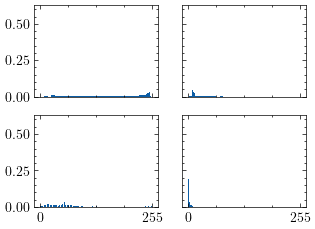

In [72]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True)
axs[0, 0].bar(counter_pattern.keys(), [v / 20398080 for v in counter_pattern.values()], width=1.0)
axs[0, 1].bar([255 - v for v in counter_structure.keys()], [v / 20398080 for v in counter_structure.values()], width=1.0)
axs[1, 0].bar(counter_pattern_real.keys(), [v / 20398080 for v in counter_pattern_real.values()], width=1.0)
axs[1, 1].bar([255 - v for v in counter_structure_real.keys()], [v / 20398080 for v in counter_structure_real.values()], width=1.0)
# axs[0].set_ylim([0, 0.15])
axs[0, 0].set_xticks([0, 255])
axs[0, 1].set_xticks([0, 255])
axs[1, 0].set_xticks([0, 255])
axs[1, 1].set_xticks([0, 255])

fig.savefig('figures/intensities', dpi=1200)